In [1]:
pip install bibtexparser

Processing /home/faculty/.cache/pip/wheels/ec/fb/46/7db6de3731f9a9f0c65a298cd67956f6a99b34864c1dc394b3/bibtexparser-1.1.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import re
import bibtexparser
from itertools import combinations
import networkx as nx
from operator import itemgetter

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


In [5]:
#import cleaned dataset
df = pd.read_csv('combined_WoS')
print('rows:',len(df))

rows: 4722


In [6]:
df_author_doi= pd.DataFrame(df['AR'])

#cut orignal authors to 50
df_ref_doi = pd.DataFrame(df['FX'].str.split(';', 50, expand=True))

df_a2a_doi = pd.concat([df_author_doi, df_ref_doi], axis=1, sort=False)
df_a2a_doi.head(1)

,AR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,10.1109/TAES.2010.5595582,"AARONS J, 1982, P IEEE, V70, P360, DOI 10.1109/PROC.1982.12314","Aarons J, 1997, J GEOPHYS RES-SPACE, V102, P17219, DOI 10.1029/97JA01118","Bishop G., 1998, P ION GPS 1998 LONG","CAMERON A, 2006, GPS WORLD JUL","Cervera M. A., 1998, ACTA GEOD GEOPHYS HU, V33, P25","Conker R. S., 2003, RADIO SCI, V38","Enge P., 2006, GLOBAL POSITIONING S","FREMOUW EJ, 1978, RADIO SCI, V13, P167, DOI 10.1029/RS013i001p00167","FREMOUW EJ, 1980, J ATMOS TERR PHYS, V42, P717, DOI 10.1016/0021-9169(80)90055-0","GHERM VE, 2003, P 12 INT C ANT PROP, V1, P413","GROVES KM, 2000, P ION GPS 2000 SALT","Hegarty C, 2001, RADIO SCI, V36, P1221, DOI 10.1029/1999RS002425","Humphreys T., 2009, IEEE J SEL TOP QUANT, V3, P716","Humphreys T. E., 2004, P ION GNSS LONG BEAC, P399","HUMPHREYS TE, 2005, [No title captured]","Humphreys TE, 2010, IEEE T AERO ELEC SYS, V46, P1624, DOI 10.1109/TAES.2010.5595583","Kintner PM, 2004, RADIO SCI, V39, DOI 10.1029/2003RS002878","Klobuchar J A, 1996, GLOBAL POSITIONING S, VI, P485, DOI DOI 10.2514/5.9781600866388.0485.0515","Knight M., 1998, P ION GPS 1998 NASHV","Ledvina B. M., 2002, GEOPHYS RES LETT, V29","LINDSEY WC, 1981, P IEEE, V69, P410, DOI 10.1109/PROC.1981.11986","Luo N, 2003, IEEE T AERO ELEC SYS, V39, P936, DOI 10.1109/TAES.2003.1238747","Morrissey TN, 2004, RADIO SCI, V39, DOI 10.1029/2002RS002838","NAKAGAMI M, 1960, STAT METHODS RADIO W, P3, DOI DOI 10.1016/B978-0-08-009306-2.50005-4","RINO CL, 1981, RADIO SCI, V16, P245, DOI 10.1029/RS016i002p00245","RINO CL, 1982, RADIO SCI, V17, P855, DOI 10.1029/RS017i004p00855","RINO CL, 1979, RADIO SCI, V14, P1135, DOI 10.1029/RS014i006p01135","Simon M. K., 2000, DIGITAL COMMUNICATIO","STEPHENS SA, 1995, IEEE T AERO ELEC SYS, V31, P78, DOI 10.1109/7.366295","VANDIERENDONCK AJ, 2005, 11 INT ION EFF S AL","VITERBI AJ, 1966, PRINCIPLES COHERENT","Y, 1982, J GEOPHYS RES SPACE, V70, P324",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
#generate dataframe containing all paper references
############################################################
#iter through rows 
a=[]  
for index, row in df_a2a_doi.iterrows():
    a.append(row.T)

#check length according to input of papers
len(a)

############################################################
#transform to dataframe
def_ref_names = pd.DataFrame(a)
#def_ref_names

#fill missing values with 'na'
def_ref_names = def_ref_names.replace(r'^\s*$', np.nan, regex=True)
def_ref_names = def_ref_names.fillna('na')

#add prefix DOI for OG paper
def_ref_names['AR'] = 'DOI '+ def_ref_names['AR']

#output
def_ref_names.head(1)

,AR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,DOI 10.1109/TAES.2010.5595582,"AARONS J, 1982, P IEEE, V70, P360, DOI 10.1109/PROC.1982.12314","Aarons J, 1997, J GEOPHYS RES-SPACE, V102, P17219, DOI 10.1029/97JA01118","Bishop G., 1998, P ION GPS 1998 LONG","CAMERON A, 2006, GPS WORLD JUL","Cervera M. A., 1998, ACTA GEOD GEOPHYS HU, V33, P25","Conker R. S., 2003, RADIO SCI, V38","Enge P., 2006, GLOBAL POSITIONING S","FREMOUW EJ, 1978, RADIO SCI, V13, P167, DOI 10.1029/RS013i001p00167","FREMOUW EJ, 1980, J ATMOS TERR PHYS, V42, P717, DOI 10.1016/0021-9169(80)90055-0","GHERM VE, 2003, P 12 INT C ANT PROP, V1, P413","GROVES KM, 2000, P ION GPS 2000 SALT","Hegarty C, 2001, RADIO SCI, V36, P1221, DOI 10.1029/1999RS002425","Humphreys T., 2009, IEEE J SEL TOP QUANT, V3, P716","Humphreys T. E., 2004, P ION GNSS LONG BEAC, P399","HUMPHREYS TE, 2005, [No title captured]","Humphreys TE, 2010, IEEE T AERO ELEC SYS, V46, P1624, DOI 10.1109/TAES.2010.5595583","Kintner PM, 2004, RADIO SCI, V39, DOI 10.1029/2003RS002878","Klobuchar J A, 1996, GLOBAL POSITIONING S, VI, P485, DOI DOI 10.2514/5.9781600866388.0485.0515","Knight M., 1998, P ION GPS 1998 NASHV","Ledvina B. M., 2002, GEOPHYS RES LETT, V29","LINDSEY WC, 1981, P IEEE, V69, P410, DOI 10.1109/PROC.1981.11986","Luo N, 2003, IEEE T AERO ELEC SYS, V39, P936, DOI 10.1109/TAES.2003.1238747","Morrissey TN, 2004, RADIO SCI, V39, DOI 10.1029/2002RS002838","NAKAGAMI M, 1960, STAT METHODS RADIO W, P3, DOI DOI 10.1016/B978-0-08-009306-2.50005-4","RINO CL, 1981, RADIO SCI, V16, P245, DOI 10.1029/RS016i002p00245","RINO CL, 1982, RADIO SCI, V17, P855, DOI 10.1029/RS017i004p00855","RINO CL, 1979, RADIO SCI, V14, P1135, DOI 10.1029/RS014i006p01135","Simon M. K., 2000, DIGITAL COMMUNICATIO","STEPHENS SA, 1995, IEEE T AERO ELEC SYS, V31, P78, DOI 10.1109/7.366295","VANDIERENDONCK AJ, 2005, 11 INT ION EFF S AL","VITERBI AJ, 1966, PRINCIPLES COHERENT","Y, 1982, J GEOPHYS RES SPACE, V70, P324",na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na


In [8]:
#filter DOIs only from resulting string in dataframe
############################################################
a = def_ref_names.values.tolist()

for lst in a:
    for ind, item in enumerate(lst):
        lst[ind] = lst[ind].split(',')[-1]

#transform list to dataframe
def_ref_names = pd.DataFrame(a)

#output reference id dataframe
def_ref_names.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,DOI 10.1109/TAES.2010.5595582,DOI 10.1109/PROC.1982.12314,DOI 10.1029/97JA01118,P ION GPS 1998 LONG,GPS WORLD JUL,P25,V38,GLOBAL POSITIONING S,DOI 10.1029/RS013i001p00167,DOI 10.1016/0021-9169(80)90055-0,P413,P ION GPS 2000 SALT,DOI 10.1029/1999RS002425,P716,P399,[No title captured],DOI 10.1109/TAES.2010.5595583,DOI 10.1029/2003RS002878,DOI DOI 10.2514/5.9781600866388.0485.0515,P ION GPS 1998 NASHV,V29,DOI 10.1109/PROC.1981.11986,DOI 10.1109/TAES.2003.1238747,DOI 10.1029/2002RS002838,DOI DOI 10.1016/B978-0-08-009306-2.50005-4,DOI 10.1029/RS016i002p00245,DOI 10.1029/RS017i004p00855,DOI 10.1029/RS014i006p01135,DIGITAL COMMUNICATIO,DOI 10.1109/7.366295,11 INT ION EFF S AL,PRINCIPLES COHERENT,P324,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na


In [9]:
#function to indentify if datapoint contains DOI
############################################################
def DOI_finder(phrase):
    if ('DOI' in phrase):
        return phrase
    else:
        return 'false'

In [10]:
#filter dataframe for datapoints which are not DOIs
############################################################
for lst in a:
    for ind, item in enumerate(lst):
        lst[ind] = DOI_finder(lst[ind])
        
df_a2a_pre = pd.DataFrame(a)
print(df_a2a_pre.shape)
df_a2a_pre.head(1)

(4722, 52)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,DOI 10.1109/TAES.2010.5595582,DOI 10.1109/PROC.1982.12314,DOI 10.1029/97JA01118,false,false,false,false,false,DOI 10.1029/RS013i001p00167,DOI 10.1016/0021-9169(80)90055-0,false,false,DOI 10.1029/1999RS002425,false,false,false,DOI 10.1109/TAES.2010.5595583,DOI 10.1029/2003RS002878,DOI DOI 10.2514/5.9781600866388.0485.0515,false,false,DOI 10.1109/PROC.1981.11986,DOI 10.1109/TAES.2003.1238747,DOI 10.1029/2002RS002838,DOI DOI 10.1016/B978-0-08-009306-2.50005-4,DOI 10.1029/RS016i002p00245,DOI 10.1029/RS017i004p00855,DOI 10.1029/RS014i006p01135,false,DOI 10.1109/7.366295,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


In [11]:
#transform reference dataframe to list
b = df_a2a_pre.values.tolist()
    
#generate IDs for each reference; enumerating through list
for lst in b:
    for ind, item in enumerate(lst):
        lst[ind] = lst[ind].split('DOI')[-1]
        
#transform list to dataframe
df_a2a_pre = pd.DataFrame(b)

In [12]:
#final dataframe containing only DOIs
############################################################
df_a2a_final = df_a2a_pre.apply(lambda x: x.str.strip('DOI '))

#output reference id dataframe
print(df_a2a_final.shape)
df_a2a_final.head(1)

(4722, 52)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,10.1109/TAES.2010.5595582,10.1109/PROC.1982.12314,10.1029/97JA01118,false,false,false,false,false,10.1029/RS013i001p00167,10.1016/0021-9169(80)90055-0,false,false,10.1029/1999RS002425,false,false,false,10.1109/TAES.2010.5595583,10.1029/2003RS002878,10.2514/5.9781600866388.0485.0515,false,false,10.1109/PROC.1981.11986,10.1109/TAES.2003.1238747,10.1029/2002RS002838,10.1016/B978-0-08-009306-2.50005-4,10.1029/RS016i002p00245,10.1029/RS017i004p00855,10.1029/RS014i006p01135,false,10.1109/7.366295,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


In [13]:
###########################

In [14]:
#transform reference dataframe to list
a = df_a2a_final.values.tolist()

#generate IDs for each reference; enumerating through list
for lst in a:
    for ind, item in enumerate(a):
        a[ind] = [elem for elem in item if elem != 'false']

#list of references to check w/ biblio
flattened = [val for sublist in a for val in sublist]
print(len(flattened))

mylist = list(dict.fromkeys(flattened))
print(len(mylist))

#Save Doi_list as text file for co_authors
############################################################
#only needed for biblio
#with open('DOI_a2a_t=full.txt', 'w') as f:
#    for item in mylist:
#        f.write("%s\n" % item)

58038
48065


In [15]:
##################################
df_a2a_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,10.1109/TAES.2010.5595582,10.1109/PROC.1982.12314,10.1029/97JA01118,false,false,false,false,false,10.1029/RS013i001p00167,10.1016/0021-9169(80)90055-0,false,false,10.1029/1999RS002425,false,false,false,10.1109/TAES.2010.5595583,10.1029/2003RS002878,10.2514/5.9781600866388.0485.0515,false,false,10.1109/PROC.1981.11986,10.1109/TAES.2003.1238747,10.1029/2002RS002838,10.1016/B978-0-08-009306-2.50005-4,10.1029/RS016i002p00245,10.1029/RS017i004p00855,10.1029/RS014i006p01135,false,10.1109/7.366295,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
1,10.1021/ef100972f,10.1021/ef0606207,10.1021/op900257f,10.1039/a827213z,false,10.1071/CH08503,10.1016/j.cej.2009.09.036,false,Peter Peregrinus,10.1021/op800091p,false,10.1021/ef900598m,10.1021/op900325e,10.1039/b310502d,10.1002/ceat.200301836,10.1002/cssc.200700036,10.1002/er.1005,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
2,10.1016/j.fuel.2010.03.040,false,10.1016/0016-2361(95)00122-L,false,10.1016/j.jaap.2004.09.002,10.1016/S0165-2370(97)00085-5,false,10.1016/S0261-3069(00)00052-2,10.1021/es990883y,10.1016/S0956-053X(02)00083-1,10.1016/j.wasman.2008.06.003,10.1016/S0165-2370(00)00201-1,false,false,false,10.1016/S0378-3820(03)00054-7,10.1016/j.ces.2006.03.054,10.1021/ie9805032,false,false,10.1016/0378-3820(95)00064-X,10.1016/j.enconman.2008.02.016,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
3,10.1016/j.fuel.2010.01.019,10.1021/es0496221,false,10.1021/ef049864m,10.1021/ie071310u,false,false,10.1016/j.fuel.2007.06.012,10.1016/0360-1285(91)90006-9,10.1016/S0032-5910(96)03115-4,false,10.1021/ef060506o,false,10.1016/0032-5910(91)80111-U,10.1021/ie8009318,10.1021/ie061212t,10.1016/j.fuproc.2009.03.016,10.1021/ie00023a044,false,false,10.1016/0032-5910(87)80128-6,10.1080/714923284,10.1002/aic.690430210,10.1016/S0032-5910(99)00185-0,10.1016/S0009-2509(01)00298-6,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
4,10.1016/j.ifset.2010.06.006,10.1016/j.lwt.2008.08.013,false,10.1016/j.ijheatmasstransfer.2005.10.036,10.1016/0260-8774(93)90063-P,10.1111/j.1365-2621.1987.tb13995.x,10.1016/j.applthermaleng.2006.02.035,false,10.1016/j.jcrysgro.2006.06.037,false,10.1016/S0260-8774(98)00112-5,10.1016/S0260-8774(98)00152-6,false,false,false,10.1080/07373939508917048,false,10.1016/0260-8774(93)90009-9,false,10.1016/j.ifset.2009.08.014,10.1016/j.ifset.2009.02.001,false,10.1016/0022-0248(72)90285-0,10.1016/0260-8774(87)90014-8,10.1016/0260-8774(89)90020-4,false,10.1111/j.1745-4603.2009.00191.x,10.1016/S0260-8774(99)00130-2,false,false,10.1021/jp963172k,10.1002/aic.11602,false,10.1002/aic.690200422,10.1007/s11483-009-9136-5,false,10.1016/j.jfoodeng.2006.02.017,10.1177/1082013209344267,10.1080/10942910600673636,false,10.1016/0260-8774(95)00049-6,false,false,false,false,false,false,false,false,false,false,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,10.1007/s11276-010-0253-3,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
4718,10.1016/j.desal.2010.04.010

In [16]:
#combine all columns into one seperated by comma
combine_col = df_a2a_final.apply(lambda x: '; '.join(filter(None, x)), axis=1)
#output combines reference by author
df_ref_id_combined = pd.DataFrame(combine_col, columns=['REFERENCE_LIST_ID'])

#Create dataframe out of original DOIs
df_combine = pd.DataFrame(df['AR'])

#Combined with reference DOIs
df_test = pd.concat([df_combine.reset_index(drop=True), df_ref_id_combined.reset_index(drop=True)], axis=1)
df_test = df_test.applymap(str)
df_test['REFERENCE_LIST_ID'] = df_test['REFERENCE_LIST_ID'].str.split('; ')
    
    
#split list of author references list into individual author-reference
s = df_test.apply(lambda x: pd.Series(x['REFERENCE_LIST_ID']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'PAPER_REFERENCE_DOI'

df_test = df_test.drop('REFERENCE_LIST_ID', axis=1).join(s)
df_test.shape

(245545, 2)

In [17]:
df_test = df_test[~df_test["PAPER_REFERENCE_DOI"].str.contains("false")]
df_test["REFERENCE"] = df_test["PAPER_REFERENCE_DOI"].astype(str)
df_test = df_test.drop(["PAPER_REFERENCE_DOI"], axis=1)
df_test.REFERENCE = df_test.REFERENCE.str.strip()

In [18]:
print(df_test.shape)
df_test.head(10)

(58039, 2)


,AR,REFERENCE
0,10.1109/TAES.2010.5595582,10.1109/TAES.2010.5595582
0,10.1109/TAES.2010.5595582,10.1109/PROC.1982.12314
0,10.1109/TAES.2010.5595582,10.1029/97JA01118
0,10.1109/TAES.2010.5595582,10.1029/RS013i001p00167
0,10.1109/TAES.2010.5595582,10.1016/0021-9169(80)90055-0
0,10.1109/TAES.2010.5595582,10.1029/1999RS002425
0,10.1109/TAES.2010.5595582,10.1109/TAES.2010.5595583
0,10.1109/TAES.2010.5595582,10.1029/2003RS002878
0,10.1109/TAES.2010.5595582,10.2514/5.9781600866388.0485.0515
0,10.1109/TAES.2010.5595582,10.1109/PROC.1981.11986


In [19]:
#Terminal Faculty Code:
############################################################
#pip install doi2bib
#doi2bib --input DOI_a2a_t=full.txt --output NETWORK_Author2Author.bib

In [20]:
#bib file loads veeery long... therefore use csv import 
#with open('NETWORK_Author2Author.bib') as bibtex_file:
#    bibtex_str = bibtex_file.read()
#bib_database = bibtexparser.loads(bibtex_str)

#bib file to dataframe
#df_bib = pd.DataFrame(bib_database.entries)
    #pd.io.json.json_normalize(bib_database.entries)
#df_bib.to_csv('SUPPORT_A2A-biblo_t=full.csv', index=False)

#print(df_bib.shape)
#df_bib.head()

# Import datasets (start here)

In [21]:
#import cleaned dataset
df_a = pd.read_csv('SUPPORT_A2A-biblo_t=full.csv')
print('rows:',len(df_a))
df_a.head(1)

rows: 50088


,journal,title,author,pages,number,volume,publisher,month,year,url,doi,ENTRYTYPE,ID,booktitle,editor
0,{IEEE} Transactions on Aerospace and Electronic Systems,Data-Driven Testbed for Evaluating {GPS} Carrier Tracking Loops in Ionospheric Scintillation,Todd E. Humph and Mark L. Psiaki and Brent M. Ledvina and Alessandro P. Cerruti and Paul M. Kintner,1609--1623,4,46,Institute of Electrical and Electronics Engineers ({IEEE}),oct,2010.0,https://doi.org/10.1109%2Ftaes.2010.5595582,10.1109/taes.2010.5595582,article,Humph_2010,NaN,NaN


In [22]:
df_a = df_a[["doi","author"]]
df_a["Arsch"] = df_a["doi"].astype(str)
df_a = df_a.drop(["doi"], axis=1)
df_a = df_a.drop_duplicates()
#df_a = df_a.rename(columns={"doi": "Arsch"})

In [23]:
df_a.head(2)

,author,Arsch
0,Todd E. Humph and Mark L. Psiaki and Brent M. Ledvina and Alessandro P. Cerruti and Paul M. Kintner,10.1109/taes.2010.5595582
1,J. Aarons,10.1109/proc.1982.12314


In [24]:
df_test.insert(2, 'author', df_test['REFERENCE'].map(df_a.set_index('Arsch')['author']))

In [25]:
#df_test = df_test.drop(["Arsch"], axis=1)

In [26]:
#find paper with soooooo many references
#filtered_df = df_refauthor[df_refauthor[1222].notnull()]
#filtered_df
#df_test[df_test['AR'].str.match('10.1088/1361-6587/aaf7e5')] #10.1016/j.phymed.2017.12.016

In [27]:
df_test = df_test.set_index('AR')
df_test.fillna('false', inplace=True)
df_test.head()

,REFERENCE,author
AR,,
10.1109/TAES.2010.5595582,10.1109/TAES.2010.5595582,false
10.1109/TAES.2010.5595582,10.1109/PROC.1982.12314,false
10.1109/TAES.2010.5595582,10.1029/97JA01118,false
10.1109/TAES.2010.5595582,10.1029/RS013i001p00167,false
10.1109/TAES.2010.5595582,10.1016/0021-9169(80)90055-0,E.J. Fremouw and R.C. Livingston and Deborah A. Miller


In [28]:
#identified error in biblio output 
###########################################################
df_test[df_test.REFERENCE == '10.1007/978-3-319-73207-7_5']

,REFERENCE,author
AR,,
10.1007/978-3-319-73207-7_5,10.1007/978-3-319-73207-7_5,Adriana Valente and and Valentina Tudisca and Claudia Pennacchiotti and Zacharoula Smyrnaiou and Konstantina Kotsari and Irene Monson{\'{\i}}s-Pay{\'{a}} and Jordi Garc{\'{e}}s and Barbara Branchini and Fabrizio L. Ricci


In [29]:
df_refauthor = df_test['author'].str.split(' and ',2000, expand=True)
df_refauthor = df_refauthor.replace(np.nan,"false", regex=True)

#rename 50th column for easier access
df_refauthor = df_refauthor.rename(columns={50: "fifty"})

#output
print(df_refauthor.shape)
df_refauthor.head()

(58039, 1223)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,fifty,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222
AR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.1109/TAES.2010.5595582,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false

In [30]:
!pip install powerlaw==1.3.4

Processing /home/faculty/.cache/pip/wheels/ac/11/07/85bc48d88deb20db323e5655867569bfc7d3f337dad13ad9f6/powerlaw-1.3.4-py3-none-any.whl


In [31]:
import powerlaw
from matplotlib import pyplot as plt

In [32]:
#just for paper output graph
#df_hi = data['author'].str.split(' and ', 1000, expand=True)
#df_hi = df_hi.replace("false",np.nan,regex=True)
#df_hi['Count'] = df_hi.notnull().sum(axis=1)

#df_hi['Count'].mean()

#df_hi[df_hi['Count']==1].shape

In [33]:
#fit = powerlaw.Fit(df_hi["Count"], discrete=True)

#fig2 = fit.plot_pdf(color='#98AFB3', marker='o')
#fit.power_law.plot_pdf(color='#4B5657', linestyle='--', ax=fig2)
#plt.xlabel('Number of Authors per Paper', fontsize = 10)
#plt.ylabel('p (X>=x)', fontsize = 10)
#plt.savefig('cut-off-point_a2a_mainauthors.png')
#plt.show()

### Datasets with different thresholds

In [34]:
df_refauthor = df_refauthor[df_refauthor["fifty"].str.contains("false")]

In [35]:
df_new = df_refauthor
df_new.shape

(57997, 1223)

In [36]:
######################################

# Combine Datasets

In [37]:
#import cleaned dataset
data = pd.read_csv('SUPPORT_Co-Author_t=full.csv')
print('rows:',len(data))
print(data.shape)
data.head()

rows: 3518
(3518, 3)


,DOI,author,year
0,10.1109/taes.2010.5595582,Todd E. Humph and Mark L. Psiaki and Brent M. Ledvina and Alessandro P. Cerruti and Paul M. Kintner,2010
1,10.1021/ef100972f,Darryl R. Godwin and Simon J. Lawton and Jonathan D. Moseley and Matthew J. Welham and Neil P. Weston,2010
2,10.1016/j.fuel.2010.03.040,A. Donatelli and P. Iovane and A. Molino,2010
3,10.1016/j.fuel.2010.01.019,Bel{\'{e}}n Gonz{\'{a}}lez and M{\'{o}}nica Alonso and J. Carlos Abanades,2010
4,10.1016/j.ifset.2010.06.006,J. S{\'{a}}nchez and Y. Ruiz and M. Ravent{\'{o}}s and J.M. Auleda and E. Hern{\'{a}}ndez,2010


In [38]:
data = data.set_index('DOI')
data.head(5)

,author,year
DOI,,
10.1109/taes.2010.5595582,Todd E. Humph and Mark L. Psiaki and Brent M. Ledvina and Alessandro P. Cerruti and Paul M. Kintner,2010
10.1021/ef100972f,Darryl R. Godwin and Simon J. Lawton and Jonathan D. Moseley and Matthew J. Welham and Neil P. Weston,2010
10.1016/j.fuel.2010.03.040,A. Donatelli and P. Iovane and A. Molino,2010
10.1016/j.fuel.2010.01.019,Bel{\'{e}}n Gonz{\'{a}}lez and M{\'{o}}nica Alonso and J. Carlos Abanades,2010
10.1016/j.ifset.2010.06.006,J. S{\'{a}}nchez and Y. Ruiz and M. Ravent{\'{o}}s and J.M. Auleda and E. Hern{\'{a}}ndez,2010


In [39]:
#select years for timebins
df_year = data['year']
#df_year = df_year.reset_index()
#df_year[df_year['year']==2011].shape

In [40]:
#cut to only 20 authors - check w/ Sri
df_co = data['author'].str.split(' and ', 20, expand=True)

df_co = df_co.rename(columns={20: "twenty"})
df_co = df_co.replace(np.nan,"false", regex=True)
#df_co = df_co[df_co["twenty"].str.contains("false")]

#output format
print(df_co.shape)
df_co.head()

(3518, 21)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,twenty
DOI,,,,,,,,,,,,,,,,,,,,,
10.1109/taes.2010.5595582,Todd E. Humph,Mark L. Psiaki,Brent M. Ledvina,Alessandro P. Cerruti,Paul M. Kintner,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
10.1021/ef100972f,Darryl R. Godwin,Simon J. Lawton,Jonathan D. Moseley,Matthew J. Welham,Neil P. Weston,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
10.1016/j.fuel.2010.03.040,A. Donatelli,P. Iovane,A. Molino,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
10.1016/j.fuel.2010.01.019,Bel{\'{e}}n Gonz{\'{a}}lez,M{\'{o}}nica Alonso,J. Carlos Abanades,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
10.1016/j.ifset.2010.06.006,J. S{\'{a}}nchez,Y. Ruiz,M. Ravent{\'{o}}s,J.M. Auleda,E. Hern{\'{a}}ndez,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


In [41]:
output = pd.merge(data, df_co, left_index=True, right_index=True)
output = output.drop(['author'], axis=1)
final = pd.merge(output, df_new, left_index=True, right_index=True)

#needed to deal w/ previouly identified error
final.replace(' ', 'false', inplace=True)

#output
print(final.shape)
final.head(1)

(41927, 1245)


,year,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,twenty,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,fifty,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,...,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222
10.1002/ad.2505,2019,Roger Howie,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,Roger Howie,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,...,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,

In [42]:
#pd.merge(df_year, final, left_index=True, right_index=True)

In [43]:
#percentage share of referenced authors - 25% appear to be not found 
final['0_y'].value_counts(1)

false                       0.259356
Giorgio Mannina             0.000930
Hari Prasad Mangalapally    0.000787
S. Malato                   0.000763
Colin A. Scholes            0.000644
                              ...   
R. Daviot                   0.000024
Kristopher B. Karnauskas    0.000024
M. R. Bennett               0.000024
A.V. Bui                    0.000024
Ardalan Vahidi              0.000024
Name: 0_y, Length: 22536, dtype: float64

In [44]:
df_assign = final.copy()

df_2019_2013 = df_assign[(df_assign['year']>=2019)] 
df_2019_2013 = df_assign[(df_assign['year']<=2013)]
print(df_2019_2013.shape)

df_2012_2006 = df_assign[(df_assign['year']>=2012)] 
df_2012_2006 = df_assign[(df_assign['year']<=2006)]
print(df_2012_2006.shape)

df_2005_1999 = df_assign[(df_assign['year']>=2005)] 
df_2005_1999 = df_assign[(df_assign['year']<=1999)]
print(df_2005_1999.shape)

(18281, 1245)
(6316, 1245)
(2853, 1245)


In [45]:
#################################################################
#WARNING: Runs for a couple of minutes.
#################################################################
from itertools import product

def iter_a2a(penis):
    og_author = penis[penis.columns[1:22]]
    ref_author = penis[penis.columns[22:]]

    df_testy = pd.DataFrame()

    for index, row in penis.iterrows():
    #split dataset into orignal and reference authors
        og_author = list(row[penis.columns[1:21]])
        ref_author = list(row[penis.columns[21:]])
    
    #delete missing values
        og_author_clean = [x for x in og_author if x != 'false']
        ref_author_clean = [x for x in ref_author if x != 'false']
    
    #append dataset row for row w/ combinations of authors
        to_append = list(product(og_author_clean, ref_author_clean)) #, year_bin))
        df_testy = df_testy.append(to_append)

    df_testy.columns = ['OG_Author','REF_Author'] #,'year_bin']
    df_testy = df_testy.reset_index().drop(['index'], axis=1)
    
    return df_testy

In [46]:
#T3
df_a2a_2005_1999 = iter_a2a(df_2005_1999)
print(df_a2a_2005_1999.shape)
df_a2a_2005_1999.to_csv('NETWORK_A2A_t=2005_1999.csv', index=False)

(32048, 2)


In [47]:
#Gamelin
#df_a2a_2005_1999[df_a2a_2005_1999['REF_Author']=='Sueo Machi'].count()
#df_a2a_2012_2006[df_a2a_2012_2006['REF_Author']=='Sueo Machi'].count()
#df_a2a_2019_2013[df_a2a_2019_2013['REF_Author']=='Sueo Machi']

In [48]:
#T2
df_a2a_2012_2006 = iter_a2a(df_2012_2006)
print(df_a2a_2012_2006.shape)
df_a2a_2012_2006.to_csv('NETWORK_A2A_t=2012_2006.csv', index=False)

(71333, 2)


In [49]:
#t1
df_a2a_2019_2013 = iter_a2a(df_2019_2013)
print(df_a2a_2019_2013.shape)
df_a2a_2019_2013.to_csv('NETWORK_A2A_t=2019_2013.csv', index=False)

(253424, 2)


In [50]:
#df_testy.to_csv('NETWORK_A2A_t=full_finalfinal.csv', index=False)

In [51]:
#import cleaned dataset
##################################################################
data = pd.read_csv('NETWORK_A2A_t=full_finalfinal.csv')
print('rows:',len(data))
print(data.shape)
data.head()
##################################################################

rows: 588682
(588682, 2)


,OG_Author,REF_Author
0,S. Norton,C. Decamps
1,S. Norton,S. Norton
2,S. Norton,D. Poncelet
3,S. Norton,R. J. Neufeld
4,D. Poncelet,C. Decamps


In [54]:
################################################################################
################################################################################
################################################################################

In [65]:
# Create Networks (source = name linke column; target = name rechte columns; vllt anpasssen)
G1 = nx.from_pandas_edgelist(df_a2a_2005_1999, source="OG_Author", target="REF_Author")
G2 = nx.from_pandas_edgelist(df_a2a_2012_2006, source="OG_Author", target="REF_Author")
G3 = nx.from_pandas_edgelist(df_a2a_2019_2013, source="OG_Author", target="REF_Author")
G_full = nx.from_pandas_edgelist(data, source="OG_Author", target="REF_Author")


# function 
def network_info(G,min_time,max_time): 
    network_info = pd.DataFrame([],[str(min_time)+"-"+str(max_time)], columns = ["Number of Nodes","Number of Edges"])
    
    network_info["Number of Nodes"] = G.number_of_nodes()
    network_info["Number of Edges"] = G.number_of_edges()
    network_info["Network Density"] = nx.density(G)
    
    G_deg = nx.degree_histogram(G)
    G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
    network_info["Average Degree"] = (sum(G_deg_sum) / G.number_of_nodes())
    
    return network_info

# application of function
ni_1 = network_info(G1,1999,2005)
ni_2 = network_info(G2,2006,2012)
ni_3 = network_info(G3,2013,2019)

info_networks = pd.concat([ni_1,ni_2,ni_3], axis=0)
info_networks

,Number of Nodes,Number of Edges,Network Density,Average Degree
1999-2005,5089,21515,0.001662,8.455492
2006-2012,11004,51383,0.000849,9.338968
2013-2019,33990,190584,0.000330,11.214122


In [78]:
degree_dict = dict(G_full.degree(G_full.nodes()))
nx.set_node_attributes(G_full, degree_dict, 'degree')
    
#sort by degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
df_g_full = pd.DataFrame(sorted_degree, columns=['name', 'degree'])

print(len(df_g_full['degree']))
print(df_g_full['degree'].mean())
print(len(df_g_full.degree[df_g_full['degree']==1]))

nx.density(G_full), nx.density(G1), nx.density(G2), nx.density(G3)

78611
11.545585223442012
5890


In [81]:
nx.density(G_full), nx.density(G1), nx.density(G2), nx.density(G3)

(0.00014687171127645353,
 0.001661849889575617,
 0.000848765577399614,
 0.00032993385508633873)

In [66]:
def degree_func(sorted_degree, topcount):
    liste_d = []
    for d in sorted_degree[:topcount]:
        liste_d.append(d)
    df_degree = pd.DataFrame(liste_d,columns = ["Top nodes by degree:", "Degree"])
    return df_degree

def betweenness_func(sorted_betweenness, topcount):
    liste_b = []
    for d in sorted_betweenness[:topcount]:
        liste_b.append(d)
    df_between = pd.DataFrame(liste_b,columns = ["Top nodes by betweenness:", "Betweenness"])
    return df_between
    
def eigenvector_func(sorted_eigenvector, topcount):
    liste_e = []
    for d in sorted_eigenvector[:topcount]:
        liste_e.append(d)
    df_eigenvector = pd.DataFrame(liste_e,columns = ["Top nodes eigenvector:", "eigenvector"])
    return df_eigenvector

In [57]:
def network_insights(G, topcount):
    
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
    
    #sort by degree
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
    eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

    # Assign each to an attribute in your network
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
    
    #sort by betweenness / eigenvector
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

    network_insights = pd.DataFrame([], columns = ["Top nodes by degree:","Top nodes by betweenness centrality:","Top nodes by eigenvector:"])
    
    df_degree = degree_func(sorted_degree, topcount)
    df_between = betweenness_func(sorted_betweenness, topcount)
    df_eigenvector = eigenvector_func(sorted_eigenvector, topcount)
    
    network_insights = pd.concat([df_degree, df_between, df_eigenvector], axis=1, sort=False)
    
    return network_insights

In [61]:
#network insights
network_insights(G3, 10)

,Top nodes by degree:,Degree,Top nodes by betweenness:,Betweenness,Top nodes eigenvector:,eigenvector
0,S. Malato,614,Sixto Malato,0.052021,J.E. Menard,0.169389
1,Sixto Malato,502,J. W. Yu,0.048231,L. Bromberg,0.169389
2,Carolina Chiellini,302,S. Malato,0.032171,T. Brown,0.169389
3,Giulio Petroni,302,Francesco Pepe,0.029574,T. Burgess,0.169389
4,M.I. Maldonado,287,M. Soto,0.028690,D. Dix,0.169389
5,Michele Torregrossa,265,L. Wang,0.026860,L. El-Guebaly,0.169389
6,Rui A.R. Boaventura,264,M.C.M. van Loosdrecht,0.023391,T. Gerrity,0.169389
7,Wolfgang Gernjak,262,Dami{\`{a}} Barcel{\'{o}},0.021204,R.J. Goldston,0.169389
8,V{\'{\i}}tor J.P. Vilar,262,Virginia L. Cunningham,0.020956,R.J. Hawryluk,0.169389
9,W. Gernjak,260,An{\'{\i}}bal Ollero,0.019994,R. Kastner,0.169389


In [62]:
#degree distribution for all years combined
from collections import Counter
from matplotlib import pyplot as plt

def plotDegreeDistribution(G1): 
    c = Counter(list(dict(nx.degree(G1)).values()))
    x, y =  zip(*sorted(c.items()))
    #y = [float(i) / sum(y) for i in y]
    plt.plot(x, y, 'bo', color = 'steelblue')
    plt.xscale('log')

    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('Degree', fontsize = 10)
    plt.ylabel('Frequency of Degree', fontsize = 10)
    plt.title('$Degree\,Distribution$', fontsize = 15)
    plt.show()

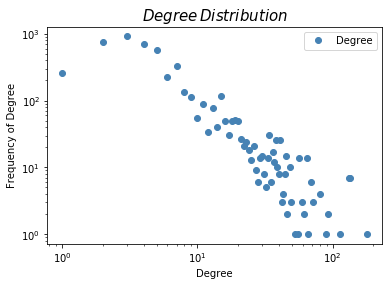

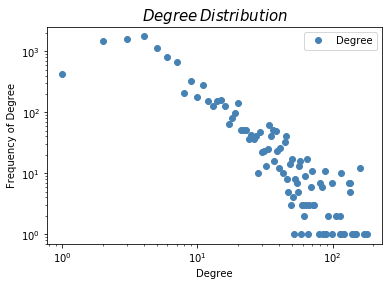

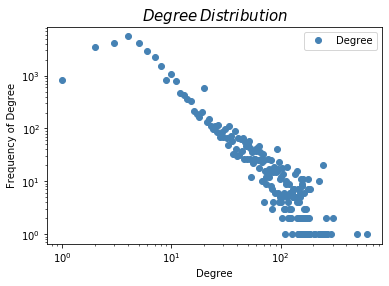

(None, None, None)

In [63]:
#network degree distribution
plotDegreeDistribution(G1), plotDegreeDistribution(G2), plotDegreeDistribution(G3)

In [ ]:
################################################################################
################################################################################
################################################################################

In [ ]:





#################################
#Old code from here onwards
#################################







In [ ]:
def create_dfs(df): #,year):
    #x = year
    #test = df
    #test  = test[test['year_published_bin']==x]
    #test = test.drop(['year_published_bin'], axis=1)
    y = df.apply(lambda r: list(combinations(r, 2)), axis=1)
    y = pd.DataFrame(y)
    y.columns = ["Names"]
    y = y.explode('Names')
    y[['From','To']] = pd.DataFrame(y.Names.values.tolist(), index= y.index)
    y = y.drop(['Names'], axis=1)
    y = y.dropna()
    y = y.query("From != To")
    #y = y[y['From'] != df['To']]
    y['index1'] = y.index
    y = y.drop_duplicates(subset=['From', 'To', 'index1'], keep='first')
    y = y.drop(['index1'], axis=1)
    return y


In [ ]:
def step1(df): #,year):
    #x = year
    #test = df
    #test  = test[test['year_published_bin']==x]
    #df = df.drop(['year_published_bin'], axis=1)
    y = df.apply(lambda r: list(combinations(r, 2)), axis=1)
    y = pd.DataFrame(y)

    return y

In [ ]:
def step2(df):
    y= df
    y.columns = ["Names"]
    y = y.explode('Names')
    y[['From','To']] = pd.DataFrame(y.Names.values.tolist(), index= y.index)
    y = y.drop(['Names'], axis=1)
    y = y.dropna()
    y = y.query("From != To")
    #y = y[y['From'] != df['To']]
    y['index1'] = y.index
    y = y.drop_duplicates(subset=['From', 'To', 'index1'], keep='first')
    y = y.drop(['index1'], axis=1)
    return y

In [ ]:
#Data for Network
y1 = create_dfs(final)

In [ ]:
y1.shape

In [ ]:
y1.head(2)

In [ ]:
y1.to_csv('y1.csv', index=True)

In [ ]:
#####################################################

In [ ]:
#Create File for Muxviz

In [ ]:
df3 = pd.read_csv('Author2Author/y1')
print(df3.shape)
df3.head(1)

## Create Network

In [ ]:
# Create Networks
G1 = nx.from_pandas_edgelist(y1, source="From", target="To")

In [ ]:
def network_info(G, name): 
    Name = str(name)
    network_info = pd.DataFrame([],["Year bin " + Name], columns = ["Number of Nodes","Number of Edges"])
    network_info["Number of Nodes"] = G.number_of_nodes()
    network_info["Number of Edges"] = G.number_of_edges()
    network_info["Network Density"] = nx.density(G)
    G_deg = nx.degree_histogram(G)
    G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
    network_info["Average Degree"] = (sum(G_deg_sum) / G.number_of_nodes())
    x = network_info
    return x

In [ ]:
info1 = network_info(G1, '=full timeframe')

In [ ]:
info1

In [ ]:
def network_insights(G):
    G = G
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
    #sort by degree
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
    eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

    # Assign each to an attribute in your network
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
    
    #sort by betweenness
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    #sort by eigenvector
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

    #network_insights = pd.DataFrame([], columns = ["Top nodes by degree:",
    #"Top 20 nodes by betweenness centrality:","Top 20 nodes by eigenvector:"])
    
    #Top 20 by degree
    liste_d = []
    for d in sorted_degree[:20]:
        liste_d.append(d)
    df_degree = pd.DataFrame(liste_d,columns = ["Top 20 nodes by degree:", "Degree"])
    
    #Top 20 by betweenness
    liste_b = []
    for d in sorted_betweenness[:20]:
        liste_b.append(d)
    df_between = pd.DataFrame(liste_b,columns = ["Top 20 nodes by betweenness:", "Betweenness"])
    
    #Top 20 by eigenvector
    liste_e = []
    for d in sorted_eigenvector[:20]:
        liste_e.append(d)
    df_eigenvector = pd.DataFrame(liste_e,columns = ["Top 20 nodes eigenvector:", "eigenvector"])
    
    #df_eigenvector missing
    network_insights = pd.concat([df_degree, df_between, df_eigenvector], axis=1, sort=False)
    return network_insights

In [ ]:
network_insights(G1)

----